In [41]:
import tensorflow as tf
from tensorflow.keras import *

# Multiple Input Model

In [44]:
input1 = layers.Input(shape=(28, 28), name='left_input')
input2 = layers.Input(shape=(28, 28), name='right_input')

In [45]:
def initialise_base_model():
    base_input = layers.Input(shape=(28, 28), name='base_input')
    flatten = layers.Flatten()(base_input)
    base_output = layers.Dense(128, activation='relu', name='base_output')(flatten)
    return models.Model(inputs=base_input, outputs=base_output)

In [46]:
base_model = initialise_base_model()

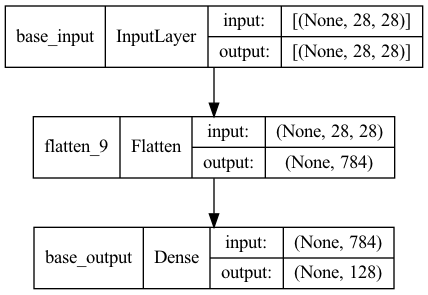

In [47]:
utils.plot_model(base_model, show_shapes=True)

In [48]:
out_vec1 = base_model(input1)
output1 = layers.Dense(10, activation='softmax', name='left_output')(out_vec1)

out_vec2 = base_model(input2)
output2 = layers.Dense(10, activation='softmax', name='right_output')(out_vec2)

In [49]:
multi_input_model = models.Model(inputs=[input1, input2], outputs=[output1, output2])

In [50]:
multi_input_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 28, 28)]     0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 28, 28)]     0           []                               
                                                                                                  
 model_9 (Functional)           (None, 128)          100480      ['left_input[0][0]',             
                                                                  'right_input[0][0]']            
                                                                                                  
 left_output (Dense)            (None, 10)           1290        ['model_9[0][0]']         

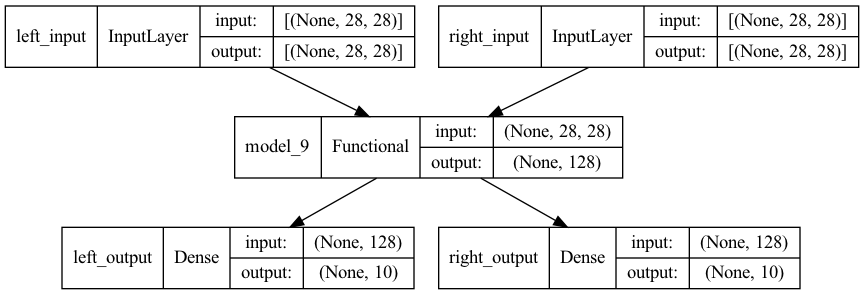

In [51]:
utils.plot_model(multi_input_model, show_shapes=True)